In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print(os.listdir()[1:5])
PATH_ratio_17_3 = os.listdir()[1]
PATH_ratio_9_1 = os.listdir()[3]
PATH_ratio_19_1 = os.listdir()[2]
PATH_ratio_39_1 = os.listdir()[4]

PATH_ratio_9_1

['20231220_TMTES_PS_17_3', '20231220_TMTES_PS_19_1', '20231220_TMTES_PS_9_1', '20240110_TMTES_PS_39_1']


'20231220_TMTES_PS_9_1'

In [28]:
PATH_sample5_device00 = os.listdir(PATH_ratio_17_3)[0]
PATH_sample5_device01 = os.listdir(PATH_ratio_17_3)[1]
PATH_sample5_device10 = os.listdir(PATH_ratio_17_3)[2]
PATH_sample5_device11 = os.listdir(PATH_ratio_17_3)[3]

PATH_sample6_device00 = os.listdir(PATH_ratio_17_3)[4]
PATH_sample6_device01 = os.listdir(PATH_ratio_17_3)[5]
PATH_sample6_device10 = os.listdir(PATH_ratio_17_3)[6]
PATH_sample6_device11 = os.listdir(PATH_ratio_17_3)[7]
PATH_sample5_device00
os.listdir(PATH_ratio_17_3+"/"+PATH_sample5_device00)[1:5]

['02_12012024_TMTES_PS_17_3_Sample5_device00_40kV_500uA_Vg-2_5_Vd-10_17cm.dat',
 '03_12012024_TMTES_PS_17_3_Sample5_device00_40kV_350uA_Vg-2_5_Vd-10_17cm.dat',
 '04_12012024_TMTES_PS_17_3_Sample5_device00_40kV_200uA_Vg-2_5_Vd-10_17cm.dat',
 '05_12012024_TMTES_PS_17_3_Sample5_device00_40kV_100uA_Vg-2_5_Vd-10_17cm.dat']

In [24]:
# Creating a function for extracting the Photocurrent peaks
def photocurrent_peaks(PATH_ratio, PATH_device, PATH_file, dark_points, new_file_name):
    df = pd.read_table(str(PATH_ratio)+"/"+str(PATH_device)+"/"+str(PATH_file))
    df = df.rename(columns = {"|IGate (A)": "|IGate| (A)", "|IDrain (A)|": "|IDrain| (A)"})
    df = df.loc[(df["Time (s)"]>=0) & (df["Time (s)"]<=600)]
    
    time_dark = dark_points
    df_dark = df[df["Time (s)"].isin(time_dark)]
    
    coefficients = np.polyfit(df_dark["Time (s)"], df_dark["|IDrain| (A)"], 2)
    polynomial_func = np.poly1d(coefficients)
    idrain_fit = polynomial_func(df["Time (s)"])

    photocurrent = df["|IDrain| (A)"] - idrain_fit
    photocurrent_file_name = str(PATH_ratio)+"/"+str(PATH_device)+"/"+"Photocurrent"+str(new_file_name)+".csv"
    
    df["Photocurrent"] = photocurrent
    df.to_csv(photocurrent_file_name, index=False, sep="\t")
    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(5)
    plt.title(new_file_name)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("|IDrain| (A)")
    ax1.plot(df["Time (s)"], df["|IDrain| (A)"], label="|IDrain|", color="blue")
    ax1.scatter(df_dark["Time (s)"], df_dark["|IDrain| (A)"], label="Fitting points", color="red")
    ax1.plot(df["Time (s)"], idrain_fit, label="Fit", color="orange")
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("|IGate| (A)")
    ax2.plot(df["Time (s)"], df["|IGate| (A)"], label="|IGate|", color="red", linestyle="dotted", linewidth = 1)
    ax1.legend(loc="lower left")
    ax2.legend()
    
    plt.savefig(str(PATH_ratio)+"/"+str(PATH_device)+"/Fitting_Plots/"+"Fit_"+str(new_file_name)+".png")
    plt.show()
    
    
    plt.plot(df["Time (s)"], photocurrent)
    plt.title(new_file_name+"_"+"Photocurrent")
    plt.ylabel("|Photocurrent| (A)")
    plt.xlabel("Time (s)")
    plt.title("Normalized_Plot_"+new_file_name)
    plt.savefig(str(PATH_ratio)+"/"+str(PATH_device)+"/Fitting_Plots/"+"Photocurrrent_"+str(new_file_name)+".png")
    plt.show()
    
    

In [30]:
def re_arrange_table(PATH):
    pd.set_option("display.precision", 8)
    df = pd.read_table(PATH, skiprows=10)
    print(df.head(10))
    
    df["Time(ms)"] /=1000
    df = df.rename(columns={"Time(ms)": "Time (s)"})
    
    df["Idrain(A)"] = abs(df["Idrain(A)"])
    df["Igate(A)"] = abs(df["Igate(A)"])
    df = df.rename(columns={"Idrain(A)": "|IDrain (A)|", "Igate(A)": "|IGate (A)"})
    
    cols = list(df.columns)
    df = df.reindex(columns=[cols[0], cols[2], cols[4], cols[1], cols[3]])
    print(df.head(10))
    
    df.to_csv(PATH, index=False, sep="\t")

In [44]:
PATH_sample11_device00 = os.listdir(PATH_ratio_9_1)[0]
PATH_sample11_device01 = os.listdir(PATH_ratio_9_1)[1]
PATH_sample11_device10 = os.listdir(PATH_ratio_9_1)[2]
PATH_sample11_device11 = os.listdir(PATH_ratio_9_1)[3]

PATH_sample12_device00 = os.listdir(PATH_ratio_9_1)[4]
PATH_sample12_device01 = os.listdir(PATH_ratio_9_1)[5]
PATH_sample12_device10 = os.listdir(PATH_ratio_9_1)[6]
PATH_sample12_device11 = os.listdir(PATH_ratio_9_1)[7]
os.listdir(PATH_ratio_17_3+"/"+PATH_sample5_device10)[1:5]

['02_12012024_TMTES_PS_17_3_Sample5_device10_40kV_500uA_Vg-2_5_Vd-10_17cm.dat',
 '03_12012024_TMTES_PS_17_3_Sample5_device10_40kV_350uA_Vg-2_5_Vd-10_17cm.dat',
 '04_12012024_TMTES_PS_17_3_Sample5_device10_40kV_200uA_Vg-2_5_Vd-10_17cm.dat',
 '05_12012024_TMTES_PS_17_3_Sample5_device10_40kV_100uA_Vg-2_5_Vd-10_17cm.dat']

In [43]:
re_arrange_table(PATH_ratio_17_3+"/"+PATH_sample5_device01+"/"+"06_12010204_TMTES_PS_17_3_Sample5_device01_trfSat_final.dat")

   Time(ms)  Vdrain(V)       Idrain(A)  Vgate(V)        Igate(A)
0       0.0      -10.0 -8.98600000e-11      20.0  5.53520000e-10
1    1000.0      -10.0 -4.56820000e-11      19.9  2.13130000e-10
2    1500.0      -10.0 -3.17590000e-11      19.8  5.80340000e-11
3    2000.0      -10.0 -2.72360000e-11      19.7  3.46460000e-11
4    2500.0      -10.0 -2.39290000e-11      19.6  2.03260000e-11
5    3000.0      -10.0 -2.14310000e-11      19.5  1.04000000e-11
6    3500.0      -10.0 -1.98140000e-11      19.4  3.43680000e-12
7    4000.0      -10.0 -1.85110000e-11      19.3 -1.36370000e-12
8    4500.0      -10.0 -1.72330000e-11      19.2 -5.56590000e-12
9    5000.0      -10.0 -1.67230000e-11      19.1 -8.54370000e-12
   Time (s)    |IDrain (A)|      |IGate (A)  Vdrain(V)  Vgate(V)
0       0.0  8.98600000e-11  5.53520000e-10      -10.0      20.0
1       1.0  4.56820000e-11  2.13130000e-10      -10.0      19.9
2       1.5  3.17590000e-11  5.80340000e-11      -10.0      19.8
3       2.0  2.72360000e-

S5_d10_500uA
02_12012024_TMTES_PS_17_3_Sample5_device10_40kV_500uA_Vg-2_5_Vd-10_17cm.dat


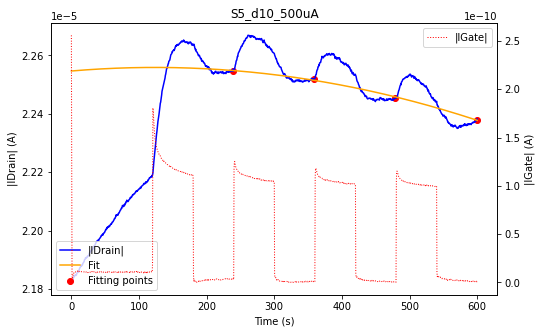

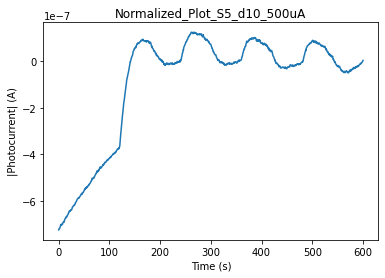

S5_d10_350uA
03_12012024_TMTES_PS_17_3_Sample5_device10_40kV_350uA_Vg-2_5_Vd-10_17cm.dat


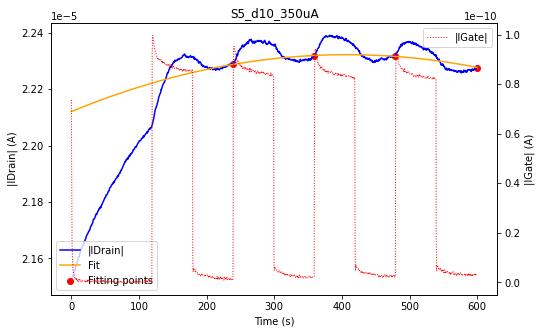

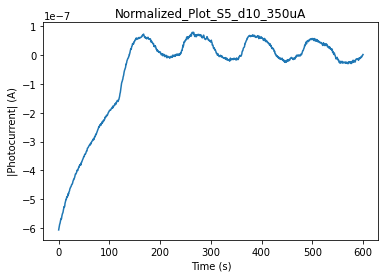

S5_d10_200uA
04_12012024_TMTES_PS_17_3_Sample5_device10_40kV_200uA_Vg-2_5_Vd-10_17cm.dat


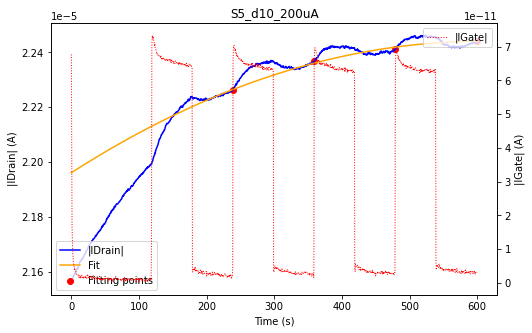

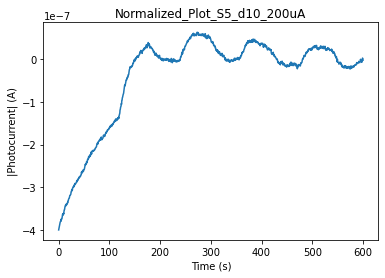

S5_d10_100uA
05_12012024_TMTES_PS_17_3_Sample5_device10_40kV_100uA_Vg-2_5_Vd-10_17cm.dat


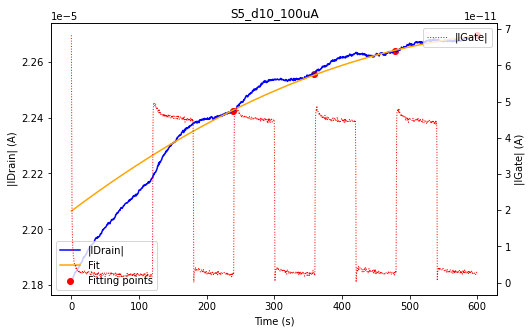

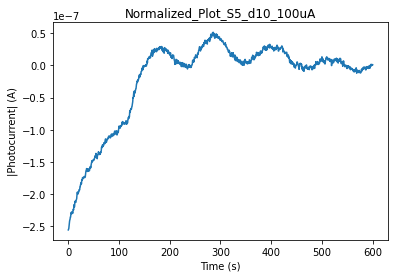

In [49]:
norm_peaks = ["S5_d10_500uA",
             "S5_d10_350uA",
             "S5_d10_200uA",
             "S5_d10_100uA"]


    
for idx in range(len(norm_peaks)):
    print(norm_peaks[idx])
    print(os.listdir(PATH_ratio_17_3+"/"+PATH_sample5_device10)[1:5][idx])
    photocurrent_peaks(PATH_ratio_17_3, PATH_sample5_device10, os.listdir(PATH_ratio_17_3+"/"+PATH_sample5_device10)[1:5][idx],
                       [239, 359, 479, 599], norm_peaks[idx])
    

In [11]:
df = pd.read_csv(PATH_ratio_17_3+"/"+PATH_sample5_device00+"/"+"02_12012024_TMTES_PS_17_3_Sample5_device00_40kV_500uA_Vg-2_5_Vd-10_17cm.csv")
df

,Time (s);|IDrain (A)|;|IGate (A);Vdrain(V);Vgate(V)
0,0;1.64E-05;1.57E-10;-10;-2.5
1,1;1.64E-05;2.35E-10;-10;-2.5
2,1.5;1.64E-05;2.41E-10;-10;-2.5
3,2;1.64E-05;2.44E-10;-10;-2.5
4,2.5;1.64E-05;2.46E-10;-10;-2.5
...,...
1219,610;1.79E-05;2.06E-10;-10;-2.5
1220,610.5;1.79E-05;2.05E-10;-10;-2.5
1221,611;1.79E-05;2.06E-10;-10;-2.5
1222,611.5;1.79E-05;2.06E-10;-10;-2.5
